In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import cross_validation
from sklearn.tree import DecisionTreeClassifier


In [34]:
file = 'datos_arboles.txt'
datos = np.loadtxt(file, delimiter=',')
X, y = datos[:,:-1], datos[:,-1]

In [35]:
#Separar las clases por las etiquetas 
clase0 = np.array(X[y==0])
clase1 = np.array(X[y==1])

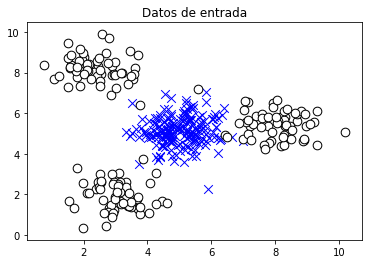

In [36]:
# visualizamos los datos de entrada
plt.figure() # instanciamos la figura
plt.scatter(clase0[:,0], clase0[:,1], s=75, facecolors='blue',
           edgecolors='black', linewidth=1, marker='x')
plt.scatter(clase1[:,0], clase1[:,1], s=75, facecolors='white',
           edgecolors='black', linewidth=1, marker='o')
plt.title('Datos de entrada')
plt.show()

In [37]:
# particionamos la base de datos en entrenamiento y validacion
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.25, random_state=5)

In [38]:
def visualizar_clasificador(clasificador, X, y):
    #definimos los máximos valores de X e y para la malla
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0
    #definimos el paso de la malla
    mesh_step_size = 0.01
    #definimos la malla para x e y
    x_vals, y_vals = np.mgrid[min_x:max_x:mesh_step_size, min_y:max_y:mesh_step_size]
    #corremos el clasificador sobre la malla
    resultados = clasificador.predict(np.c_[x_vals.ravel(), y_vals.ravel()])
    #reordenamos la salida
    print(resultados)
    resultados = resultados.reshape(x_vals.shape)
    #creamos la figura
    plt.figure()
    #elegimos los colores
    plt.pcolormesh(x_vals,y_vals,resultados,cmap=plt.cm.Paired)
    #ubicamos los puntos
    plt.scatter(X[:,0],X[:,1],c=y,s=75,edgecolors='black',linewidth=1,cmap=plt.cm.Paired)
    #especificamos los límites de la gráfica
    plt.xlim(x_vals.min(), x_vals.max())
    plt.ylim(y_vals.min(), y_vals.max())
    #especificamos los puntos que se visualizarán sobre los ejes
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0)))
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0)))
    #Graficamos
    plt.show()

[ 1.  1.  1. ...,  1.  1.  1.]


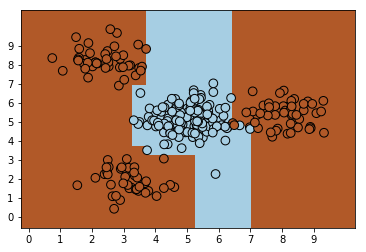

In [39]:
# construimos el árbol de decision
parametros = {'random_state':0, 'max_depth': 4}
# instanciamos el clasificador
clasificador = DecisionTreeClassifier(**parametros)
# entrenamos el clasificador
clasificador.fit(X_train, y_train)
visualizar_clasificador(clasificador, X_train, y_train)

[ 1.  1.  1. ...,  1.  1.  1.]


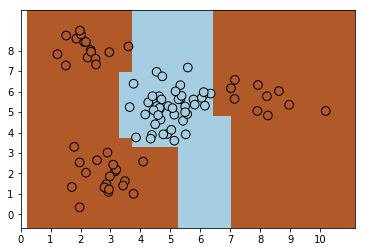

In [40]:
# validamos el clasificador
y_pred = clasificador.predict(X_test)
visualizar_clasificador(clasificador, X_test, y_pred)

In [41]:
# mostramos el reporte de clasificación
nombres_clases = ['Clase0', 'Clase1']
print('\n' + '#'*70)
print('\n Desempeño del clasificador sobre el conjunto de entrenamiento\n')
print(classification_report(y_train, clasificador.predict(X_train), target_names=nombres_clases))
print('\n' + '#'*70)

# mostramos el reporte de clasificación
nombres_clases = ['Clase0', 'Clase1']
print('\n' + '#'*70)
print('\n Desempeño del clasificador sobre el conjunto de validacion\n')
print(classification_report(y_test, clasificador.predict(X_test), target_names=nombres_clases))
print('\n' + '#'*70)



######################################################################

 Desempeño del clasificador sobre el conjunto de entrenamiento

             precision    recall  f1-score   support

     Clase0       0.99      1.00      1.00       137
     Clase1       1.00      0.99      1.00       133

avg / total       1.00      1.00      1.00       270


######################################################################

######################################################################

 Desempeño del clasificador sobre el conjunto de validacion

             precision    recall  f1-score   support

     Clase0       0.93      1.00      0.97        43
     Clase1       1.00      0.94      0.97        47

avg / total       0.97      0.97      0.97        90


######################################################################


# Bosques Aleatorios

In [42]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [43]:
file = 'datos_bosques_aleatorios.txt'
datos = np.loadtxt(file, delimiter=',')
X, y = datos[:,:-1], datos[:,-1]

In [44]:
# definimos los parametros para el bosque aleatorio
parametros = {'n_estimators':100, 'max_depth':4, 'random_state':0}

In [45]:
# particionamos la base de datos en entrenamiento y validacion
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.25, random_state=5)

In [46]:
# instanciamos los clasificadores
# bosque aleatorios (aleatoriedad en las caracteristicas)
clasificador_bosque = RandomForestClassifier(**parametros)
# bosque extremadamente aleatorios (aleatoriedad en las caracteristicas y observaciones)
clasificador_extremo = ExtraTreesClassifier(**parametros)

# Entrenamos los clasificadores
clasificador_bosque.fit(X_train, y_train)
clasificador_extremo.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=4, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [48]:
# validamos los clasificadores
y_bosque_pred = clasificador_bosque.predict(X_test)
y_extremo_pred = clasificador_extremo.predict(X_test)

[ 2.  2.  2. ...,  0.  0.  0.]


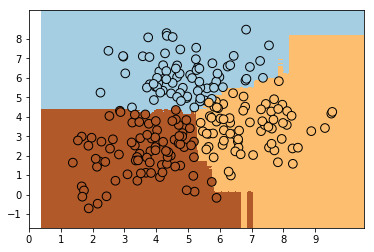

In [50]:
# visualizamos
visualizar_clasificador(clasificador_bosque, X_test, y_bosque_pred)

[ 2.  2.  2. ...,  0.  0.  0.]


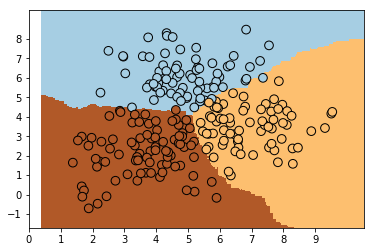

In [51]:
visualizar_clasificador(clasificador_extremo, X_test, y_bosque_pred)